# 2. Tree-Based Methods
Ruotian Jiang 
8389636738

# a&b(i)&b(ii)

In [5]:
import csv
import pandas as pd
from sklearn.preprocessing import Imputer
import numpy as np

train_file = pd.read_csv('/Users/ruotianjiang/Downloads/aps_failure_training_set.csv', skiprows = 20)
test_file = pd.read_csv('/Users/ruotianjiang/Downloads/aps_failure_test_set.csv', skiprows = 20)

train_file = np.array(train_file)
test_file = np.array(test_file)
data = np.concatenate((train_file, test_file))

pattern = ['na'] 
new_data = []

for i in range(len(data)):
    new_row = ['NaN' if x in pattern else x for x in data[i][1:]]
    new_data.append(new_row)
    
imp = Imputer(missing_values='NaN' , strategy='mean', axis=0) 
imp.fit(new_data)
imputed_data = imp.transform(new_data)
imputed_data = pd.DataFrame(imputed_data)
std = imputed_data.std()
mean = imputed_data.mean()
cv = []
for i in range(len(std)):
    cv.append(std[i]/mean[i])
print(cv)

[4.3286078354357853, 2.1782725939440408, 2.1676533085378886, 206.72149958176453, 22.293670429503308, 18.209015502890768, 91.460653595836447, 42.084342529569859, 17.625908567425444, 8.7532995203566664, 5.4751162554349166, 2.9642299310403146, 2.3525878821684465, 2.8124979751566856, 6.2749800798927389, 32.167057340536758, 2.3155400947419187, 18.506308128781928, 43.144479563585563, 78.622987735907657, 9.1119912216458196, 9.0671954539294184, 2.2542266522583447, 2.2761144767667703, 3.0858848873966314, 2.8534713174175961, 10.569202321811572, 113.88275538316807, 23.18705992823811, 86.085637511436801, 5.7304853575294405, 3.8590349934226182, 40.902518755773826, 49.248634585265535, 38.342319174677279, 28.330035620783189, 33.040131957282725, 12.009060553563613, 3.0219214295150549, 3.2498953482638955, 3.9437812651642119, 77.461101301120721, 9.019869597830489, 7.3749671271994535, 12.050427803801705, 7.5655691690646272, 2.8378149469062866, 3.0666491096667361, 8.7044064150516505, 15.382156772229585, 2

# b(iii)

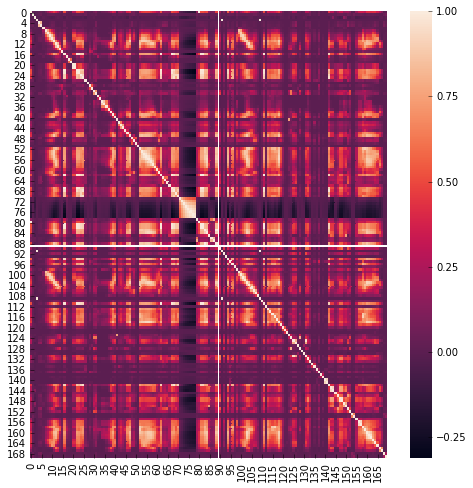

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd


corr_data = imputed_data.corr()
plt.figure(figsize= (8,8))
sns.heatmap(corr_data)  
plt.show()

# b(iV)

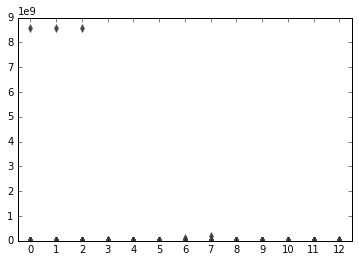

In [9]:
from matplotlib import pyplot as plt
import seaborn as sns

CV = sorted(cv, reverse=True)
index = []
value = []
new_data1 = np.array(imputed_data).T
for i in range(0, 13):
    index.append(cv.index(CV[i]))
    value.append(new_data1[index[i]])
    
value = np.array(value)    
value = value.T
value = pd.DataFrame(value)
plt.figure()
sns.boxplot(data = value)  
plt.show()



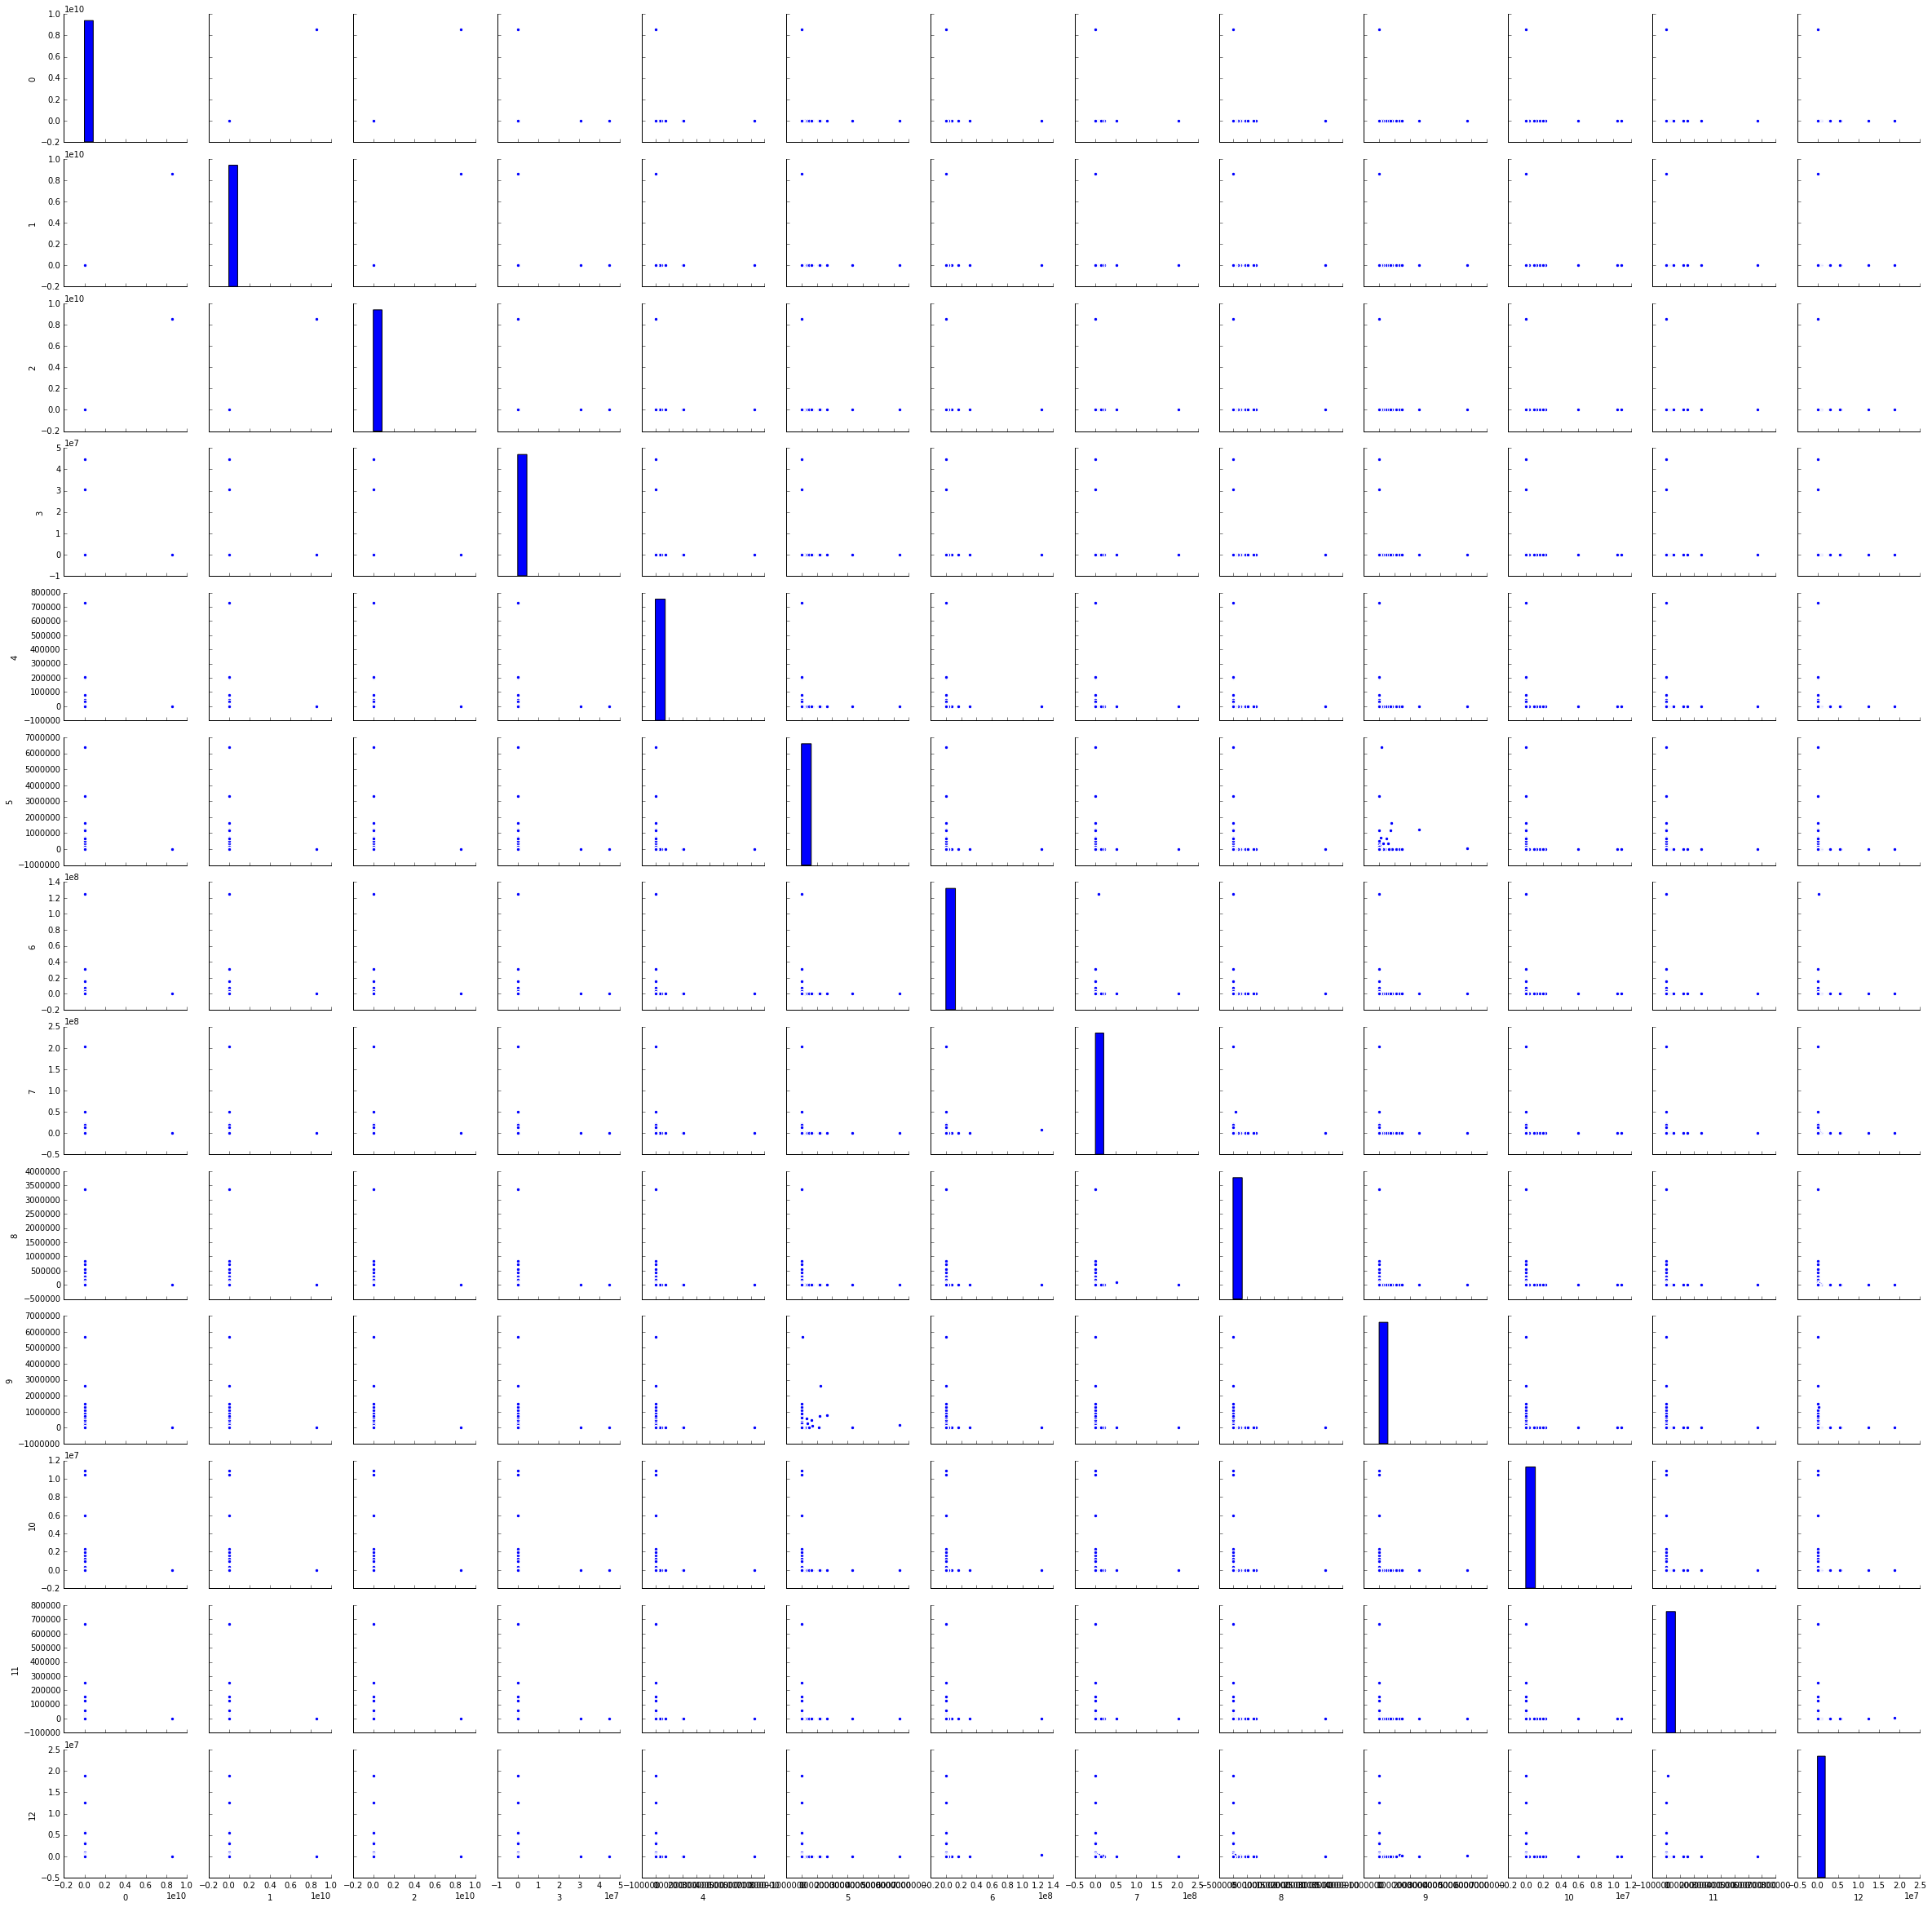

In [11]:
sns.pairplot(value)

# b(V)  
this data set is imbalanced which has 74625 negative points and 1375 postive points

In [13]:
count_neg = 0
data = pd.DataFrame(data)
for val in data[0]:
    if val == 'neg':
        count_neg += 1
print(count_neg)
count_pos = 76000-74625
print(count_pos)

74625
1375


# c for training set 

/Library/Python/2.7/site-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


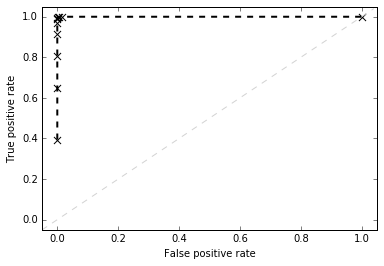

0.999982542373
[[58999     1]
 [   32   968]]
misclassification
0.00055


In [20]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn import feature_selection as fs
import statsmodels.discrete.discrete_model as sm


pd_data = pd.DataFrame(data[0])
pd_data=pd_data.replace("neg",0)
pd_data=pd_data.replace("pos",1)
label = pd_data
#print(label)
y_train = label.iloc[:60000]
y_test = label.iloc[60000:]
X_train = imputed_data[:60000]
X_test = imputed_data[60000:]


clf = RandomForestClassifier(random_state=0,oob_score=True)
clf.fit(X_train, y_train)

y_true=y_train
y_pred=clf.predict(X_train)
y_hat = clf.predict_proba(X_train)[:,1]

y_hat=np.ravel(y_hat)

fprs, tprs, thresholds = metrics.roc_curve(y_true, y_hat)


plt.plot(fprs, tprs, 'k--', lw=2)
plt.scatter(fprs, tprs, c='k', marker='x', s=50)
plt.plot(np.arange(-.05, 1.05, .01), np.arange(-.05, 1.05, .01), '--', color='lightgray')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim([0-.05, 1+.05])
plt.ylim([0-.05, 1+.05])
plt.show()
print(metrics.roc_auc_score(y_train, y_hat))
print(metrics.confusion_matrix(y_true, y_pred))
print("misclassification")
print(1-clf.score(X_train,y_train))

In [23]:
print("oob_error")
print 1 - clf.oob_score_

oob_error
0.00835


# c for test set 

/Library/Python/2.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


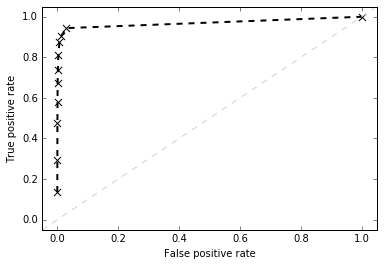

0.969176490667
[[15608    17]
 [  123   252]]
misclassification
0.00875


In [24]:
clf = RandomForestClassifier(random_state=0,oob_score=True)
clf.fit(X_train, y_train)

y_true=y_test
y_pred=clf.predict(X_test)
y_hat = clf.predict_proba(X_test)[:,1]

y_hat=np.ravel(y_hat)

fprs, tprs, thresholds = metrics.roc_curve(y_true, y_hat)


plt.plot(fprs, tprs, 'k--', lw=2)
plt.scatter(fprs, tprs, c='k', marker='x', s=50)
plt.plot(np.arange(-.05, 1.05, .01), np.arange(-.05, 1.05, .01), '--', color='lightgray')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim([0-.05, 1+.05])
plt.ylim([0-.05, 1+.05])
plt.show()
print(metrics.roc_auc_score(y_test, y_hat))
print(metrics.confusion_matrix(y_true, y_pred))
print("misclassification")
print(1-clf.score(X_test,y_test))

In [26]:
print("oob_error")
print 1 - clf.oob_score_

oob_error
0.00835


# d for train set

/Library/Python/2.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


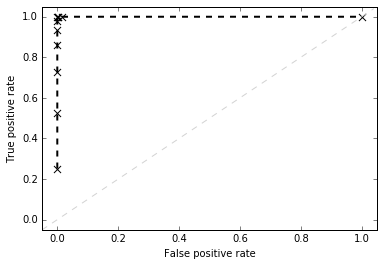

0.99998459322
[[59000     0]
 [   64   936]]
misclassification
0.00106666666667


In [27]:
clf = RandomForestClassifier(random_state=0,oob_score=True,class_weight = 'balanced')
clf.fit(X_train, y_train)

y_true=y_train
y_pred=clf.predict(X_train)
y_hat = clf.predict_proba(X_train)[:,1]

y_hat=np.ravel(y_hat)

fprs, tprs, thresholds = metrics.roc_curve(y_true, y_hat)


plt.plot(fprs, tprs, 'k--', lw=2)
plt.scatter(fprs, tprs, c='k', marker='x', s=50)
plt.plot(np.arange(-.05, 1.05, .01), np.arange(-.05, 1.05, .01), '--', color='lightgray')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim([0-.05, 1+.05])
plt.ylim([0-.05, 1+.05])
plt.show()
print(metrics.roc_auc_score(y_train, y_hat))
print(metrics.confusion_matrix(y_true, y_pred))
print("misclassification")
print(1-clf.score(X_train,y_train))

In [28]:
print("oob_error")
print 1 - clf.oob_score_

oob_error
0.0104


# d for test set

/Library/Python/2.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


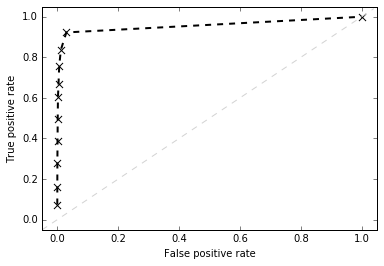

0.95663616
[[15603    22]
 [  189   186]]
misclassification
0.0131875


In [29]:



clf = RandomForestClassifier(random_state=0,class_weight = 'balanced',oob_score=True)
clf.fit(X_train, y_train)

y_true=y_test
y_pred=clf.predict(X_test)
y_hat = clf.predict_proba(X_test)[:,1]

y_hat=np.ravel(y_hat)

fprs, tprs, thresholds = metrics.roc_curve(y_true, y_hat)


plt.plot(fprs, tprs, 'k--', lw=2)
plt.scatter(fprs, tprs, c='k', marker='x', s=50)
plt.plot(np.arange(-.05, 1.05, .01), np.arange(-.05, 1.05, .01), '--', color='lightgray')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim([0-.05, 1+.05])
plt.ylim([0-.05, 1+.05])
plt.show()
print(metrics.roc_auc_score(y_test, y_hat))
print(metrics.confusion_matrix(y_true, y_pred))
print("misclassification")
print(1-clf.score(X_test,y_test))

In [30]:
print("oob_error")
print 1 - clf.oob_score_

oob_error
0.0104


# e

In [ ]:
from weka.core import jvm
from weka.core.converters import ndarray_to_instances
import os
import traceback
from weka.core.converters import Loader
from weka.classifiers import Classifier, SingleClassifierEnhancer, MultipleClassifiersCombiner, FilteredClassifier, PredictionOutput, Kernel, KernelClassifier
from weka.classifiers import Evaluation
from weka.filters import Filter
from weka.core.classes import Random, from_commandline
import weka.plot.classifiers as plot_cls
import weka.plot.graph as plot_graph
import weka.core.types as types
jvm.stop()
jvm.start()

classifier = Classifier(classname="weka.classifiers.trees.LMT")
#classifier.build_classifier(wekaTrain)
evaluation = Evaluation(wekaTrain)
score=evaluation.crossvalidate_model(classifier, wekaTrain, 10, Random(42))

# f